In [35]:
# Importing Libs: 
import ast # turning list to str
import numpy as np # for calculation
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt

# Setting Up
warnings.filterwarnings('ignore')
ds = pd.read_parquet(r"C:\Users\The Dev Reda\Desktop\Data\Python_Data_Science_Jobs_EDA_Cleaning\output\cleaned_data.parquet", engine = 'fastparquet')
data = ds.copy()
data.sample()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
229538,Data Analyst,Game Data Analyst,Canada,via BeBee Canada,Full-time,False,Canada,2023-07-13 07:09:32,False,False,Canada,None,104668.0,41.0,SOFTGAMES,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",7


### What are the most demanded skills for the top 3 most popular data roles?
- 1 - top 3 most popular data roles
- 2 - the most demanded skills
- 3 - calculate skills count based on job title short
- 4 - calculate in percentage
- 5 - plotting

In [36]:
data_usa = data[data['job_country'] == 'United States']

In [37]:
top3 = data_usa['job_title_short'].value_counts().sort_values(ascending=False).head(3).index # to specify only index not value
top3 = top3.to_list() # turning results to list
top3

['Data Analyst', 'Data Scientist', 'Data Engineer']

In [38]:
data_usa = data_usa.explode('job_skills') 

data_count = data_usa.groupby(['job_skills','job_title_short']).size()

data_count = data_count.reset_index(name='skill_count') # turning series to dataframe to apply other functions

data_count.sort_values(by='skill_count', ascending=False, inplace=True) # ordering the dataset by skills count 

data_count

,job_skills,job_title_short,skill_count
1208,sql,Data Analyst,5635
352,excel,Data Analyst,5353
951,python,Data Scientist,4829
1210,sql,Data Scientist,3575
1209,sql,Data Engineer,3527
...,...,...,...
308,docker,Cloud Engineer,1
307,docker,Business Analyst,1
1318,terraform,Senior Data Scientist,1
306,dlib,Data Scientist,1


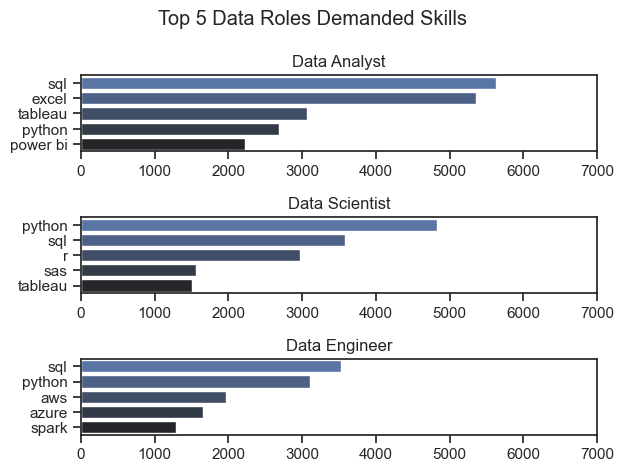

In [39]:
fig, ax = plt.subplots(len(top3), 1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(top3):
    filter = data_count[data_count['job_title_short'] == job_title].head(5) # filtering the data to get the top 5 skills for each job title
    sns.barplot(data=filter, x='skill_count', y='job_skills', ax=ax[i], palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 7000) # setting the x axis limit to 7500

fig.suptitle('Top 5 Data Roles Demanded Skills') # setting the title for the whole figure
fig.tight_layout()
plt.show()


### Adding Percentage

In [40]:
# % of skill job posting = ( skill count of job posting / total count of job posting)

# total count of job posting dataset 
job_total = data['job_title_short'].value_counts().reset_index(name='job_total')

# joining datasets
data_perc =  pd.merge(data_count, job_total, how='left', on='job_title_short')

# % of skill job posting = ( skill count of job posting / total count of job posting)
data_perc['skills_percentage'] = 100 * (data_perc['skill_count'] / data_perc['job_total'])

data_perc

,job_skills,job_title_short,skill_count,job_total,skills_percentage
0,sql,Data Analyst,5635,39508,14.262934
1,excel,Data Analyst,5353,39508,13.549155
2,python,Data Scientist,4829,28835,16.747009
3,sql,Data Scientist,3575,28835,12.398127
4,sql,Data Engineer,3527,30917,11.407963
...,...,...,...,...,...
1494,docker,Cloud Engineer,1,2556,0.039124
1495,docker,Business Analyst,1,11012,0.009081
1496,terraform,Senior Data Scientist,1,4862,0.020568
1497,dlib,Data Scientist,1,28835,0.003468


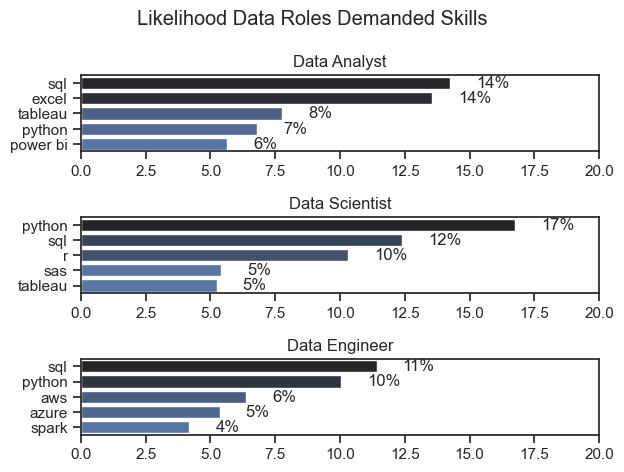

In [58]:
fig, ax = plt.subplots(len(top3), 1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(top3):
    filter = data_perc[data_perc['job_title_short'] == job_title].head(5) # filtering the data to get the top 5 skills for each job title
    sns.barplot(data=filter, x='skills_percentage', y='job_skills', hue='skill_count' , ax=ax[i], palette='dark:b_r') #hue is the value that you eant to color
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 20) # setting the x axis limit to 7500
    ax[i].get_legend().remove()

    for n, v in enumerate(filter['skills_percentage']): # setting labels of percentage 
        ax[i].text(v + 1 , n, f'{v:.0f}%', va='center')


fig.suptitle('Likelihood Data Roles Demanded Skills') # setting the title for the whole figure
fig.tight_layout() # fix the overlap after running 
plt.show()